# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [89]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_uncleaned = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results_uncleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [90]:
# Checking the number of mice.
mice_number = mouse_results_uncleaned["Mouse ID"].nunique()
mice_number

249

In [111]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_results_uncleaned[mouse_results_uncleaned.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].values

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
val_g989 = "g989"
mouse_g989_data = mouse_results_uncleaned.loc[mouse_results_uncleaned["Mouse ID"] == val_g989]
mouse_g989_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_cleaned = mouse_results_uncleaned.loc[mouse_results_uncleaned["Mouse ID"] != val_g989]
mouse_results_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [94]:
# Checking the number of mice in the clean DataFrame.
mice_number_cleaned = mouse_results_cleaned["Mouse ID"].nunique()
mice_number_cleaned

248

## Summary Statistics

In [115]:
# Pulling the list of drugs and removing duplicates to be able to set drug names as an index
drug_list_full = mouse_metadata.filter(["Drug Regimen"], axis=1)
drug_list_values = drug_list_full.drop_duplicates("Drug Regimen", keep='first')
drug_list_values = drug_list_values.sort_values("Drug Regimen", ascending=True)
drug_list = drug_list_values.set_index("Drug Regimen")
drug_list

""
Drug Regimen
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


In [96]:
mouse_results_drug_group = mouse_results_cleaned.groupby("Drug Regimen")

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume = mouse_results_drug_group["Tumor Volume (mm3)"]

mean_tumor_vol = tumor_volume.mean()
median_tumor_vol = tumor_volume.median()
var_tumor_vol = tumor_volume.var()
stdev_tumor_vol = tumor_volume.std()
sem_tumor_vol = tumor_volume.sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_volume_summary = drug_list.copy()
tumor_volume_summary["Mean Tumor Volume"] = mean_tumor_vol
tumor_volume_summary["Median Tumor Volume"] = median_tumor_vol
tumor_volume_summary["Tumor Volume Variance"] = var_tumor_vol
tumor_volume_summary["Tumor Volume Std. Dev"] = stdev_tumor_vol
tumor_volume_summary["Tumor Volume Std. Err"] = sem_tumor_vol

tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [118]:
timepoint_count = mouse_results_drug_group["Timepoint"].count()
timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: title={'center': 'Observed Mouse Timepoints per Drug'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

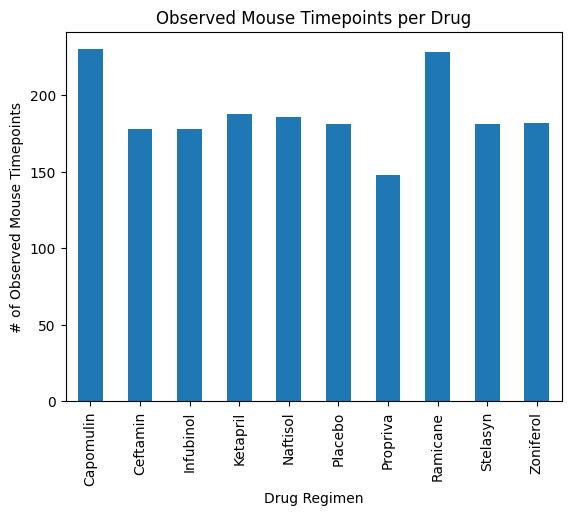

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_timepoint = drug_list.copy()
drug_and_timepoint["Timepoint Counts"] = timepoint_count
pandas_plot = drug_and_timepoint.plot.bar(x=None, y="Timepoint Counts", xlabel="Drug Regimen", 
                                          ylabel="# of Observed Mouse Timepoints", legend=None, 
                                          title="Observed Mouse Timepoints per Drug")
pandas_plot

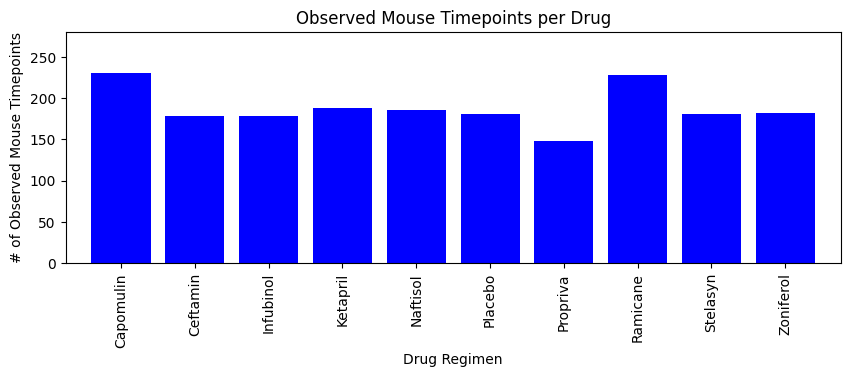

In [202]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_list_values["Drug Regimen"]
#x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = timepoint_count

plt.figure(figsize=(10,3))
plt.bar(x_axis, y_axis, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)
plt.title("Observed Mouse Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


In [168]:
# Created a new dataframe with unique mice and their gender
mouse_gender_list = mouse_results_cleaned.filter(["Mouse ID", "Sex"], axis=1)
mouse_gender_list = mouse_gender_list.drop_duplicates("Mouse ID", keep='first')
mouse_gender_list = mouse_gender_list.set_index("Mouse ID")
mouse_gender_list

,Sex
Mouse ID,
b128,Female
f932,Male
g107,Female
a457,Female
c819,Male
...,...
t565,Female
i557,Female
m957,Female


In [183]:
# Gender breakdown of the mice in the cleaned sample
mice_gender_count = mouse_gender_list["Sex"].value_counts()
mice_gender_count

Sex
Male      125
Female    123
Name: count, dtype: int64

<Axes: ylabel='Sex'>

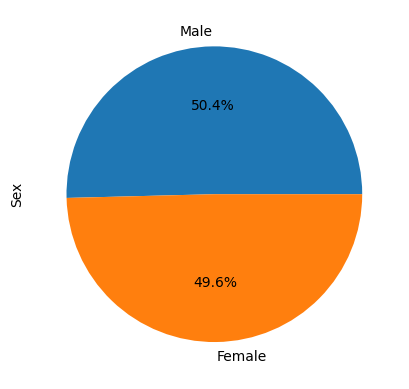

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot_pandas = mice_gender_count.plot.pie(ylabel="Sex", autopct="%1.1f%%")
gender_plot_pandas

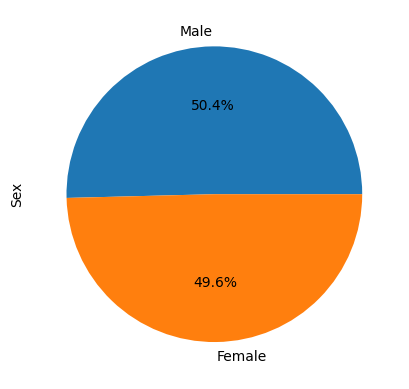

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
plt.pie(mice_gender_count, labels=sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [250]:
# Created a new DataFrame that displays each mouse's max timepoint value
mouse_results_cleaned
mouse_id_sort = mouse_results_cleaned.sort_values("Timepoint", ascending=False)
mouse_id_sort = mouse_id_sort.drop_duplicates("Mouse ID", keep='first')
#mouse_id_sort.set_index(drop=True)
mouse_id_sort

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27
155,l872,0,45.000000,0,Placebo,Male,19,30
135,d133,0,45.000000,0,Zoniferol,Male,5,30


In [251]:
drug_regimens_analyzed = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [252]:
mouse_drug_analysis = mouse_id_sort.groupby("Drug Regimen")

In [253]:
# Sorting mouse data by drug regimen and saving the tumor volume results to a variable
mice_capomulin = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Capomulin")]
mice_ramicane = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Ramicane")]
mice_infubinol = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Infubinol")]
mice_ceftamin = mouse_id_sort[(mouse_id_sort["Drug Regimen"] == "Ceftamin")]

tumor_volume_capomulin = mice_capomulin["Tumor Volume (mm3)"]
tumor_volume_ramicane = mice_ramicane["Tumor Volume (mm3)"]
tumor_volume_infubinol = mice_infubinol["Tumor Volume (mm3)"]
tumor_volume_ceftamin = mice_ceftamin["Tumor Volume (mm3)"]

In [254]:
# Generating the quartiles, and IQR for each treatment group
#Capomulin
quartiles_capomulin = tumor_volume_capomulin.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

#Ramicane
quartiles_ramicane = tumor_volume_ramicane.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_capomulin - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

#Infubinol
quartiles_infubinol = tumor_volume_infubinol.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

#Ceftamin
quartiles_ceftamin = tumor_volume_ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

#Summary of Drug and Tumor Volume data
print("Capomulin Summary")
print(f"The lower quartile of Capomulin tumor volume is: {lowerq_capomulin}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_capomulin}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_capomulin}")
print(f"The median of Capomulin tumor volume is: {quartiles_capomulin[0.5]}")
print(f"Values below {lower_bound_capomulin} could be outliers")
print(f"Values above {upper_bound_capomulin} could be outliers")
print("-----------------------------------------------------------------------")
print("Ramicane Summary")
print(f"The lower quartile of Ramicane tumor volume is: {lowerq_ramicane}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq_ramicane}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr_ramicane}")
print(f"The median of Ramicane tumor volume is: {quartiles_ramicane[0.5]}")
print(f"Values below {lower_bound_ramicane} could be outliers")
print(f"Values above {upper_bound_ramicane} could be outliers")
print("-----------------------------------------------------------------------")
print("Infubinol Summary")
print(f"The lower quartile of Infubinol tumor volume is: {lowerq_infubinol}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq_infubinol}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr_infubinol}")
print(f"The median of Infubinol tumor volume is: {quartiles_infubinol[0.5]}")
print(f"Values below {lower_bound_infubinol} could be outliers")
print(f"Values above {upper_bound_infubinol} could be outliers")
print("-----------------------------------------------------------------------")
print("Ceftamin Summary")
print(f"The lower quartile of Ceftamin tumor volume is: {lowerq_ceftamin}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq_ceftamin}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr_ceftamin}")
print(f"The median of Ceftamin tumor volume is: {quartiles_ceftamin[0.5]}")
print(f"Values below {lower_bound_ceftamin} could be outliers")
print(f"Values above {upper_bound_ceftamin} could be outliers")
print("-----------------------------------------------------------------------")


Capomulin Summary
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
-----------------------------------------------------------------------
Ramicane Summary
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Values below 18.72955176 could be outliers
Values above 54.30681135 could be outliers
-----------------------------------------------------------------------
Infubinol Summary
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquarti

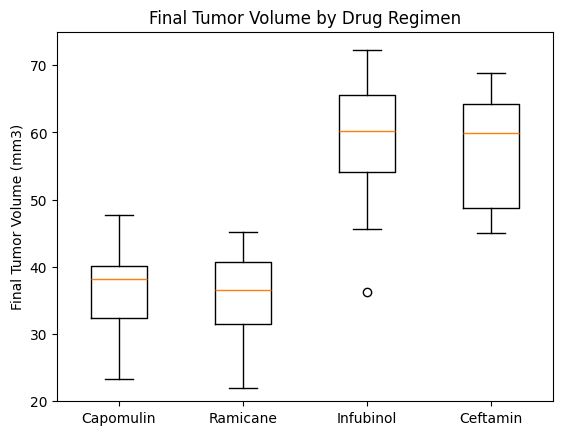

In [255]:
x_axis = np.arange(len(drug_regimens_analyzed)) +1

plt.boxplot([tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens_analyzed)
plt.ylim(20,75)
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


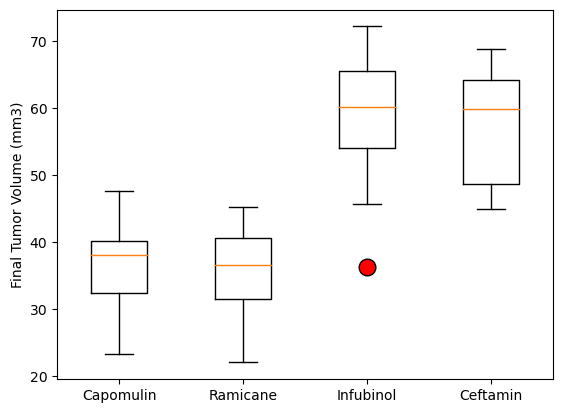

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [249]:
# Finding a mouse treated with Capomulin
mouse_results_capomulin = mouse_results_cleaned.loc[mouse_results_cleaned["Drug Regimen"] == "Capomulin"]
mouse_results_capomulin = mouse_results_capomulin.sort_values("Mouse ID", ascending=True)
mouse_results_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1051,y793,20,40.716428,2,Capomulin,Male,17,17
1564,y793,35,36.327870,2,Capomulin,Male,17,17
1292,y793,25,38.992734,2,Capomulin,Male,17,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17


In [257]:
#Selected mouse "l509"
selected_mouse = mouse_results_capomulin.loc[mouse_results_capomulin["Mouse ID"] == "l509"]
selected_mouse = selected_mouse.sort_values("Timepoint", ascending=True)
selected_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


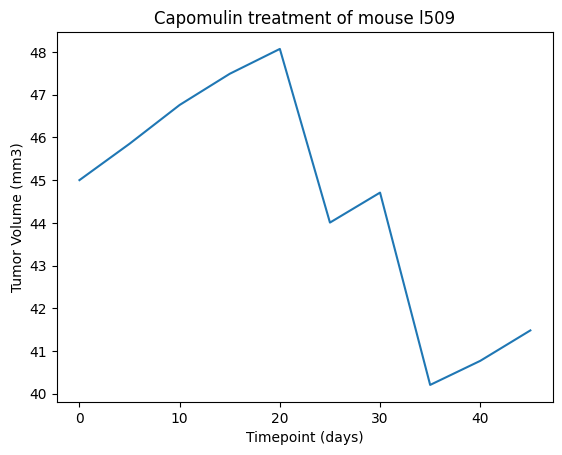

In [260]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [2]:
mouse_results_capomulin

NameError: name 'mouse_results_capomulin' is not defined

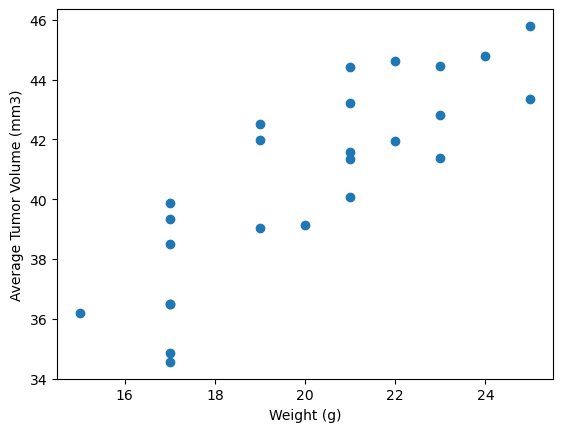

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


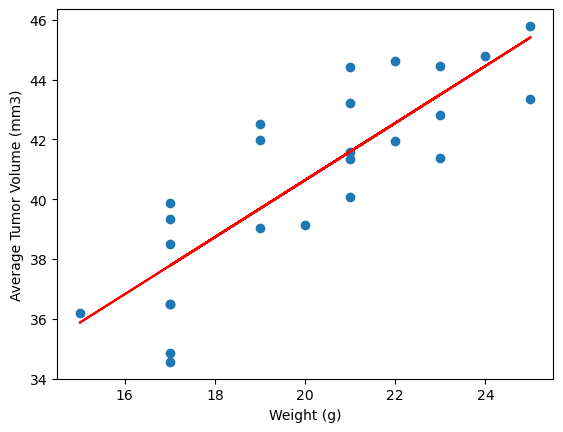

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
